In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/german_credit_data.csv')

In [4]:
data.head()

,ID,Name,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,Amall Leingang,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,Marelda Knoebel,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,Adalhard Sautter,49,male,1,own,little,NaN,2096,12,education,good
3,3,Wilmot Natter,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,Bronson Strehle,53,male,2,free,little,little,4870,24,car,bad


In [6]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [9]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [11]:
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [12]:
data1=data.fillna('Missing')
data1.groupby(['Sex','Checking account']).size().unstack()

Checking account,Missing,little,moderate,rich
Sex,,,,
female,116,88,86,20
male,278,186,183,43


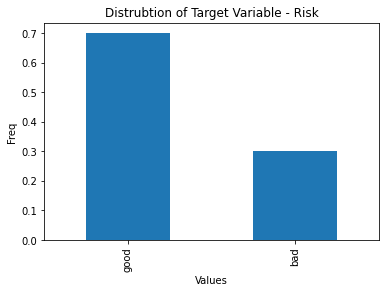

In [13]:
data.Risk.value_counts(normalize=True).plot(kind='bar',title='Distrubtion of Target Variable - Risk');
plt.xlabel('Values');
plt.ylabel('Freq');

#A bit imbalanced

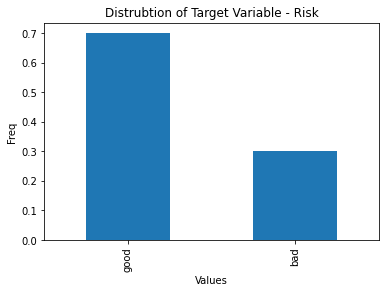

In [14]:
data.Risk.value_counts(normalize=True).plot(kind='bar',title='Distrubtion of Target Variable - Risk');
plt.xlabel('Values');
plt.ylabel('Freq');

#A bit imbalanced

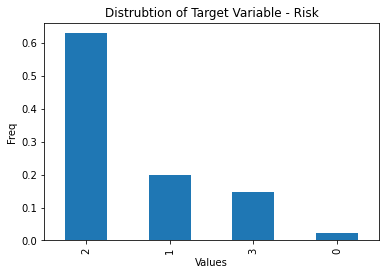

In [15]:
data.Job.value_counts(normalize=True).plot(kind='bar',title='Distrubtion of Target Variable - Risk');
plt.xlabel('Values');
plt.ylabel('Freq');

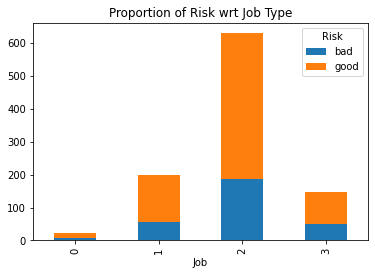

In [16]:
data.groupby(['Job','Risk']).size().unstack().plot(kind='bar',stacked=True,title='Proportion of Risk wrt Job Type');

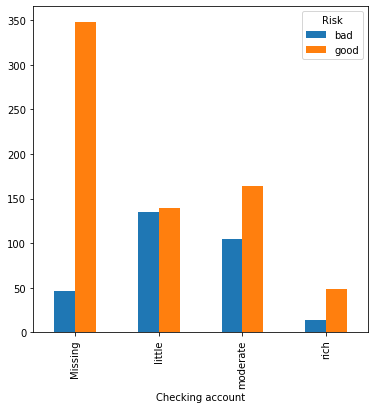

In [17]:
data1.groupby(['Checking account','Risk']).size().unstack().plot(kind='bar',figsize=(6,6));

#'little' Checking accounts have more risk for defaulting  

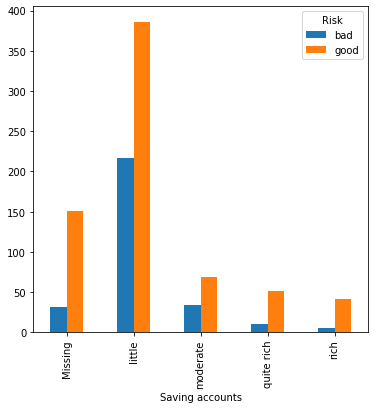

In [18]:
data1.groupby(['Saving accounts','Risk']).size().unstack().plot(kind='bar',figsize=(6,6));

#'little' and 'moderate' Saving accounts are bit more default risky relatively  

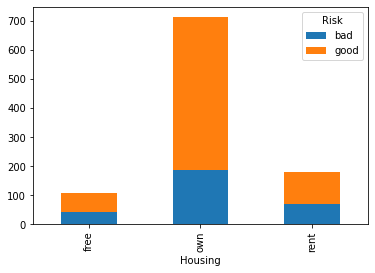

In [19]:
data1.groupby(['Housing','Risk']).size().unstack().plot(kind='bar',stacked=True);

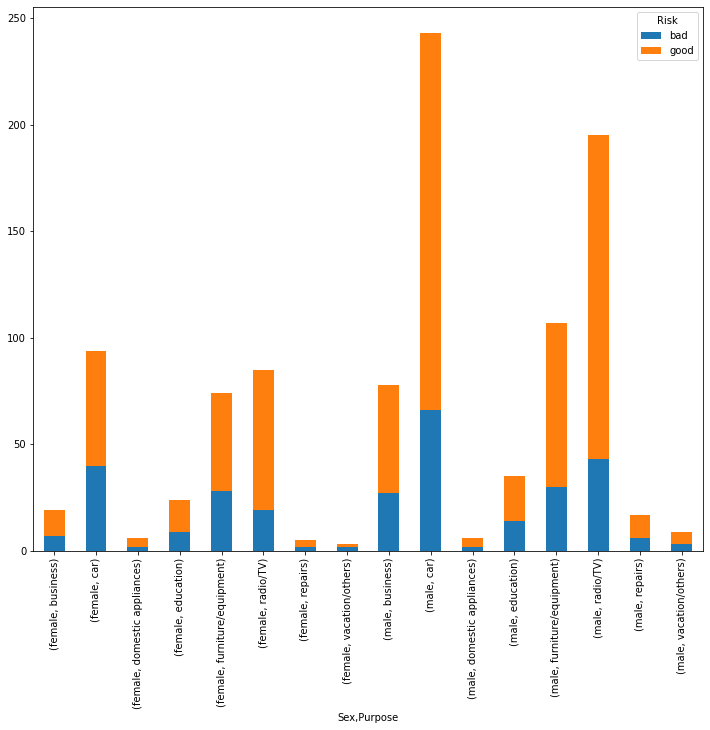

In [20]:
data1.groupby(['Sex','Purpose','Risk']).size().unstack().plot(kind='bar',stacked=True,figsize=(12,10));

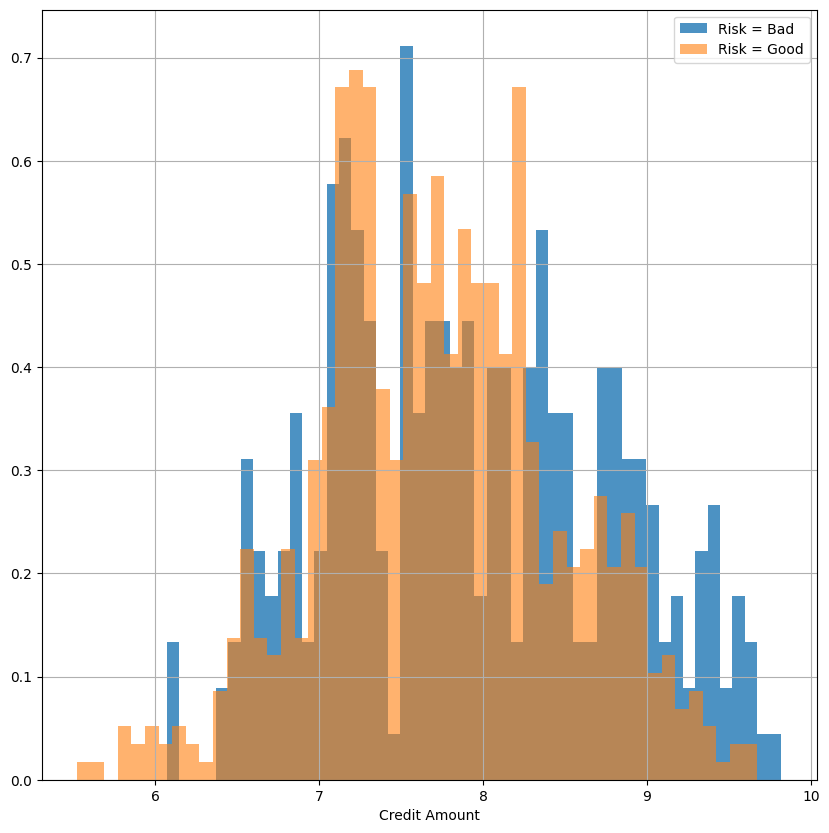

In [9]:
plt.figure(figsize=(10,10))
plt.xlabel('Credit Amount')
data[data.Risk=='bad']['Credit amount'].apply(np.log).hist(alpha=0.8,bins=50,label='Risk = Bad', density=True)
data[data.Risk=='good']['Credit amount'].apply(np.log).hist(alpha=0.6,bins=50,label='Risk = Good', density=True)
plt.legend()
plt.show()

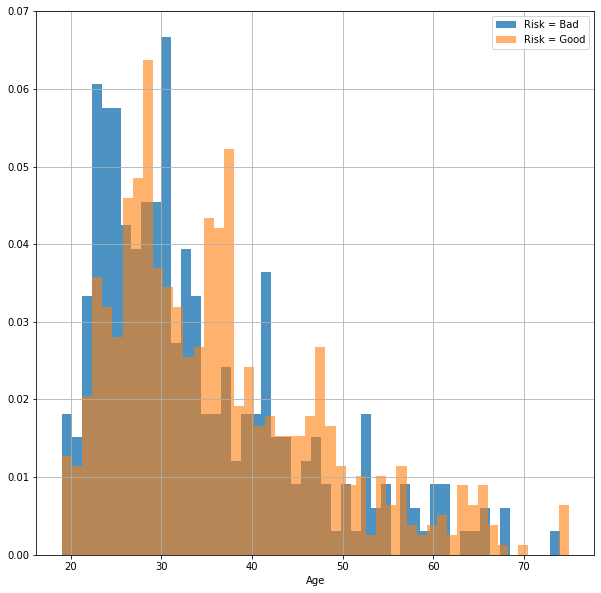

In [22]:
plt.figure(figsize=(10,10))
plt.xlabel('Age')
data[data.Risk=='bad']['Age'].hist(alpha=0.8,bins=50,label='Risk = Bad', density=True)#,color='G')
data[data.Risk=='good']['Age'].hist(alpha=0.6,bins=50,label='Risk = Good', density=True)#,color='R')
plt.legend();

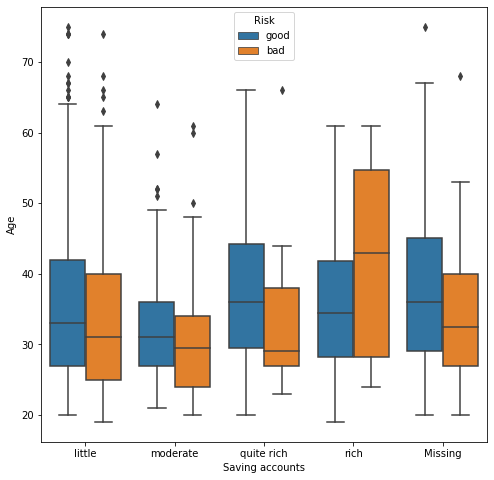

In [23]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Age',x='Saving accounts',hue='Risk',data=data1,order=['little','moderate','quite rich','rich','Missing']);

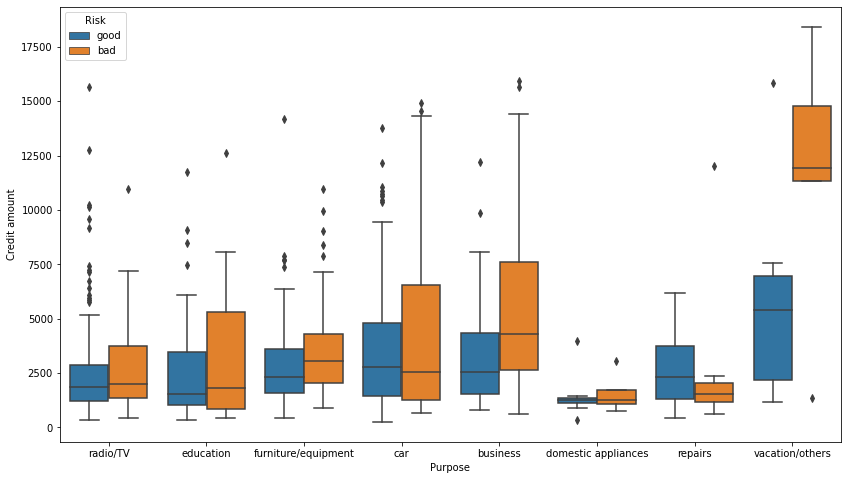

In [24]:
plt.figure(figsize=(14,8))
sns.boxplot(y='Credit amount',x='Purpose',hue='Risk',data=data1);

#From this plot, Vacation/others variable will be helpful in knowing the risk.. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


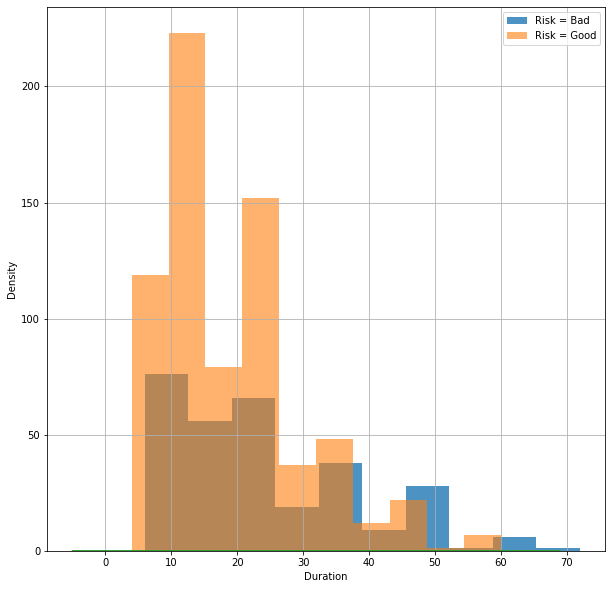

In [25]:
plt.figure(figsize=(10,10))
plt.xlabel('Duration')
#data[data.Risk=='good']['Credit amount'].hist(alpha=0.5,bins=50,label='Risk = Good')#,color='R')
data[data.Risk=='bad']['Duration'].hist(alpha=0.8,label='Risk = Bad')#,color='G')
data[data.Risk=='good']['Duration'].hist(alpha=0.6,label='Risk = Good')#,color='R')
sns.distplot(data[data.Risk=='good']['Duration'])
plt.legend();

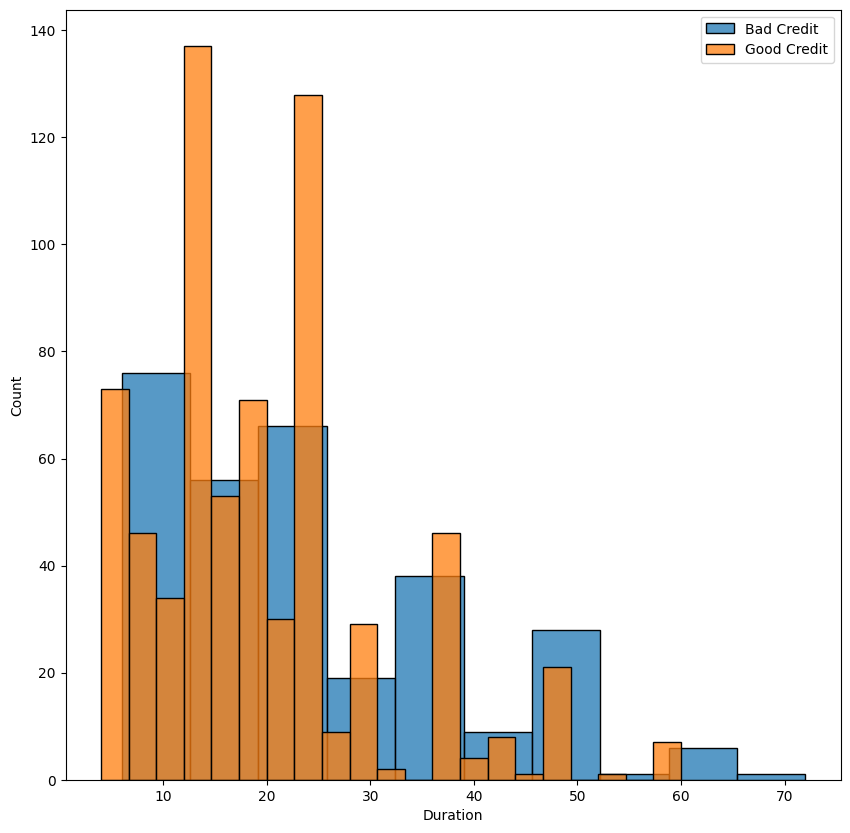

In [14]:
plt.figure(figsize=(10,10))
g2 = sns.histplot(data[data.Risk=='bad']["Duration"], label='Bad Credit');
g2 = sns.histplot(data[data.Risk=='good']["Duration"],label='Good Credit');
plt.legend();

In [27]:
def get_duration_buckets(var):
    if var<=24:
        return '0-2 Years'
    elif var<=48:
        return '2-4 years'
    else:
        return '> 4 years'

In [28]:
#data1.Duration=data1.Duration.map(get_duration_buckets)

In [29]:
data1.Duration.value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration, dtype: int64

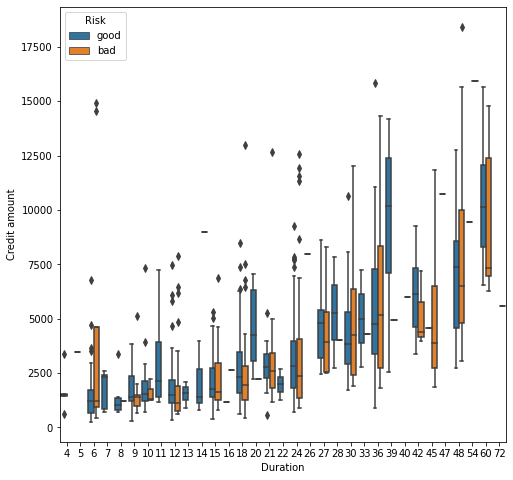

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Duration',y='Credit amount',hue='Risk',data=data1)

In [31]:
dummy_frame=data1
for col in list(data1.columns):
    #print(col,'-->',data1[col].dtype)
    if np.dtype(data1[col])=='object':            #drop_first=True removes the first dummy column 
        dummy_frame=dummy_frame.merge(pd.get_dummies(data1[col],prefix=col,drop_first=True),left_index=True, right_index=True)
        dummy_frame.drop(col,axis=1,inplace=True)
dummy_frame.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,67,2,1169,6,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,22,2,5951,48,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,49,1,2096,12,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,45,2,7882,42,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,53,2,4870,24,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
dummy_frame.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Risk_good'],
      dtype='object')

In [33]:
dummy_frame.to_csv('/content/drive/MyDrive/MO810_MC959_2022S2_SHARE/Dados/german_credit_data_.csv')